In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-data/new.csv


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pd.set_option("display.max_columns", 100)
plt.rcParams["figure.figsize"] = (7,4)


In [16]:
# change path here
csv_path = "/kaggle/input/customer-data/new.csv"


In [17]:
raw = pd.read_csv(csv_path)
print("rows, cols:", raw.shape)
raw.head()


rows, cols: (2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [18]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [19]:
raw.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [20]:
raw.shape

(2240, 29)

In [21]:
# unify column names
raw.columns = [c.strip().replace(" ", "_") for c in raw.columns]

In [22]:
# date → parsed
if "Dt_Customer" in raw.columns:
    raw["Dt_Customer"] = pd.to_datetime(raw["Dt_Customer"], errors="coerce", dayfirst=True)
    raw["Join_Year"]  = raw["Dt_Customer"].dt.year
    raw["Join_Month"] = raw["Dt_Customer"].dt.month
    raw["Join_Day"]   = raw["Dt_Customer"].dt.day

In [23]:
# numeric cast for common columns
to_numeric = ["Income","Year_Birth","Kidhome","Teenhome","Recency","NumDealsPurchases",
              "NumWebPurchases","NumCatalogPurchases","NumStorePurchases",
              "NumWebVisitsMonth","AcceptedCmp1","AcceptedCmp2","AcceptedCmp3",
              "AcceptedCmp4","AcceptedCmp5","Complain","Response","Z_CostContact","Z_Revenue"]

In [24]:
for c in to_numeric:
    if c in raw.columns:
        raw[c] = pd.to_numeric(raw[c], errors="coerce")

# minimal NA handling: drop a few missing income rows only, rest fill with median/mode
if "Income" in raw.columns:
    raw = raw.dropna(subset=["Income"])

for c in raw.select_dtypes(include=[np.number]).columns:
    raw[c] = raw[c].fillna(raw[c].median())

for c in raw.select_dtypes(include=["object"]).columns:
    raw[c] = raw[c].fillna("Unknown")

# drop constant / tutorial artifacts if present
for c in ["Z_CostContact","Z_Revenue"]:
    if c in raw.columns and raw[c].nunique() <= 1:
        raw = raw.drop(columns=c)

print("after clean:", raw.shape)


after clean: (2216, 30)


In [25]:
# numeric + categorical splits
num_cols = raw.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = raw.select_dtypes(include=["object"]).columns.tolist()
print("numerics:", len(num_cols), "| categoricals:", len(cat_cols))

numerics: 27 | categoricals: 2


In [26]:
# basic stats
raw[num_cols].describe().T.head(12)

,count,mean,std,min,25%,50%,75%,max
ID,2216.0,5588.353339,3249.376275,0.0,2814.75,5458.5,8421.75,11191.0
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.00,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.00,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.00,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.00,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.00,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.00,12.0,50.00,259.0


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


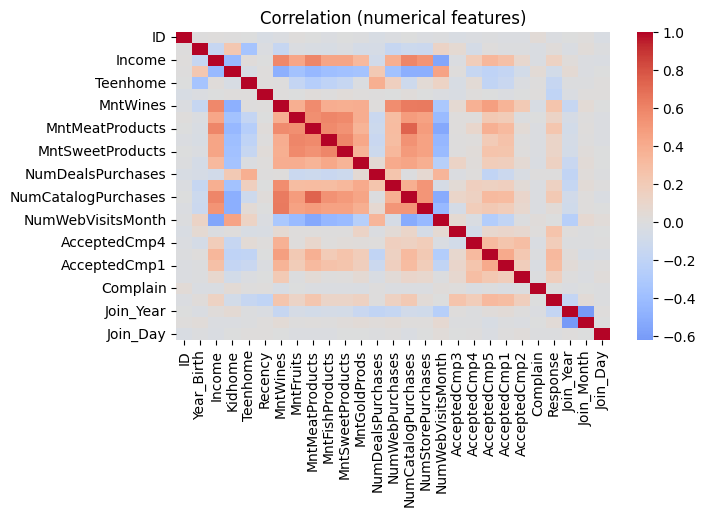

In [27]:
# correlation snapshot
sns.heatmap(raw[num_cols].corr(), cmap="coolwarm", center=0)
plt.title("Correlation (numerical features)")
plt.show()

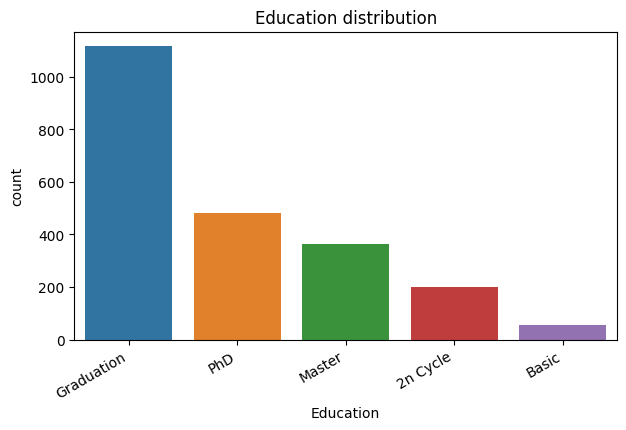

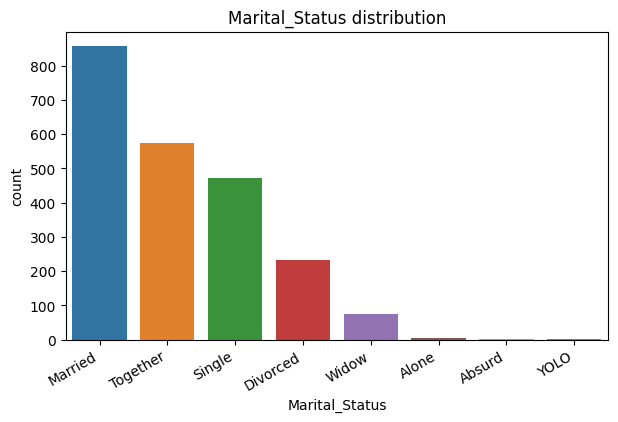

In [28]:
# top categories preview
for c in cat_cols[:3]:
    ax = sns.countplot(x=c, data=raw, order=raw[c].value_counts().index)
    ax.set_title(f"{c} distribution")
    plt.xticks(rotation=30, ha="right")
    plt.show()

In [29]:
# age (anchor to 2025)
if "Year_Birth" in raw.columns:
    raw["Age_Years"] = 2025 - raw["Year_Birth"].astype(int)

# tenure (days since join)
if "Dt_Customer" in raw.columns:
    raw["Tenure_Days"] = (raw["Dt_Customer"].max() - raw["Dt_Customer"]).dt.days

# household
if "Kidhome" not in raw.columns: raw["Kidhome"] = 0
if "Teenhome" not in raw.columns: raw["Teenhome"] = 0
raw["Kids_Total"] = raw["Kidhome"].astype(int) + raw["Teenhome"].astype(int)

# spend totals
spend_cols = [c for c in raw.columns if c.startswith("Mnt")]
raw["Spend_Total"] = raw[spend_cols].sum(axis=1) if spend_cols else 0

# purchase totals
buy_cols = [c for c in ["NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases"] if c in raw.columns]
raw["Buys_Total"] = raw[buy_cols].sum(axis=1) if buy_cols else 0

# basket value
raw["Basket_Avg"] = np.where(raw["Buys_Total"]>0, raw["Spend_Total"]/raw["Buys_Total"], 0)

# channel mix
raw["Share_Web"]     = np.where(raw["Buys_Total"]>0, raw.get("NumWebPurchases",0)/raw["Buys_Total"], 0)
raw["Share_Catalog"] = np.where(raw["Buys_Total"]>0, raw.get("NumCatalogPurchases",0)/raw["Buys_Total"], 0)
raw["Share_Store"]   = np.where(raw["Buys_Total"]>0, raw.get("NumStorePurchases",0)/raw["Buys_Total"], 0)

# compact accepted count
camp_cols = [c for c in ["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5"] if c in raw.columns]
raw["Campaigns_Accepted"] = raw[camp_cols].sum(axis=1) if camp_cols else 0


In [30]:
encoded = raw.copy()
for c in cat_cols:
    encoded[c] = pd.factorize(encoded[c])[0]  # different style from LabelEncoder


In [31]:
feature_pool = [
    "Age_Years","Income","Kids_Total","Recency","Tenure_Days",
    "Spend_Total","Buys_Total","Basket_Avg",
    "Share_Web","Share_Catalog","Share_Store",
    "NumWebVisitsMonth","Complain","Campaigns_Accepted"
]
use_cols = [c for c in feature_pool if c in encoded.columns]
X = encoded[use_cols].copy()

# gentle cap to limit extreme outliers (1st–99th percentile)
for c in X.columns:
    lo, hi = X[c].quantile(0.01), X[c].quantile(0.99)
    X[c] = X[c].clip(lo, hi)

scaler = RobustScaler()
Xz = scaler.fit_transform(X)

PCA 2D variance: 0.536


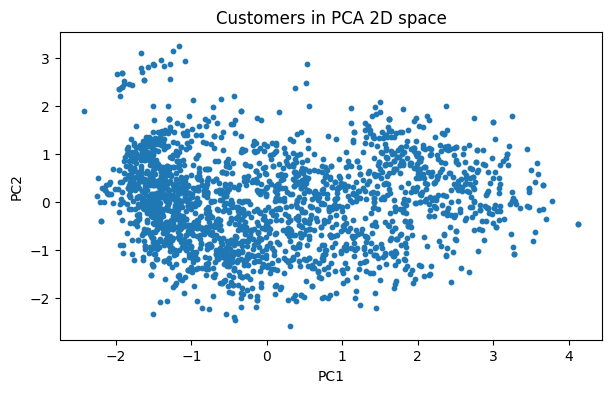

In [32]:
pca2 = PCA(n_components=2, random_state=7)
Z2 = pca2.fit_transform(Xz)
print("PCA 2D variance:", round(pca2.explained_variance_ratio_.sum(), 3))

plt.scatter(Z2[:,0], Z2[:,1], s=10)
plt.title("Customers in PCA 2D space")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()


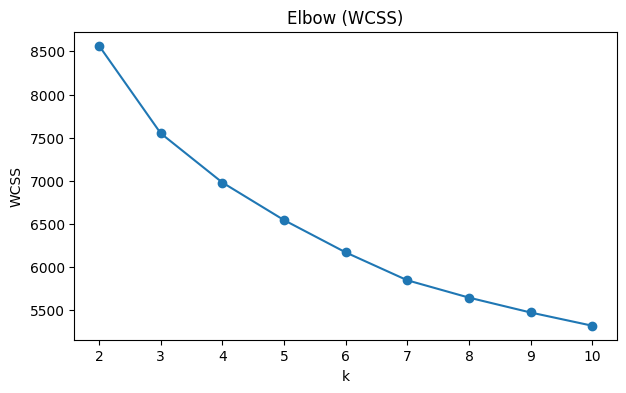

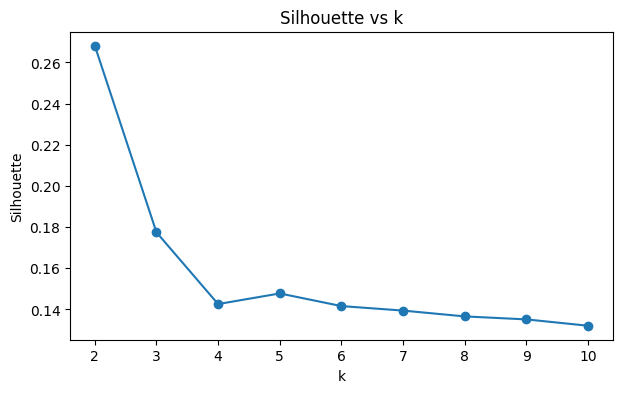

selected k (max silhouette): 2


In [33]:
k_range = range(2, 11)
wcss = []
sils = []

for k in k_range:
    km = KMeans(n_clusters=k, n_init=30, max_iter=600, random_state=7, init="k-means++")
    labels = km.fit_predict(Xz)
    wcss.append(km.inertia_)
    sils.append(silhouette_score(Xz, labels))

pd.DataFrame({"k": list(k_range), "WCSS": wcss, "Silhouette": sils})

plt.plot(list(k_range), wcss, marker="o"); plt.title("Elbow (WCSS)"); plt.xlabel("k"); plt.ylabel("WCSS"); plt.show()
plt.plot(list(k_range), sils, marker="o"); plt.title("Silhouette vs k"); plt.xlabel("k"); plt.ylabel("Silhouette"); plt.show()

best_k = int(pd.Series(sils, index=k_range).idxmax())
print("selected k (max silhouette):", best_k)


In [36]:
# === run clustering ===
final_km = KMeans(
    n_clusters=best_k, 
    n_init=30, 
    max_iter=600, 
    random_state=7, 
    init="k-means++"
)

cluster_id = final_km.fit_predict(Xz)   # <— creates the cluster labels

print("silhouette (final):", round(silhouette_score(Xz, cluster_id), 3))


silhouette (final): 0.268


In [37]:
out = raw.copy()
out["Segment"] = cluster_id

profile_vars = ["Income","Age_Years","Spend_Total","Buys_Total","Basket_Avg",
                "Share_Web","Share_Catalog","Share_Store","Recency","NumWebVisitsMonth",
                "Campaigns_Accepted","Complain"]
profile_vars = [v for v in profile_vars if v in out.columns]

segment_view = out.groupby("Segment")[profile_vars].mean().round(2)
segment_view["count"] = out.groupby("Segment").size()
segment_view.sort_values(["Spend_Total" if "Spend_Total" in segment_view else "count"], ascending=False)


,Income,Age_Years,Spend_Total,Buys_Total,Basket_Avg,Share_Web,Share_Catalog,Share_Store,Recency,NumWebVisitsMonth,Campaigns_Accepted,Complain,count
Segment,,,,,,,,,,,,,
1,72416.80,58.01,1265.84,21.58,61.48,0.26,0.26,0.40,49.13,3.64,0.61,0.01,846
0,39792.19,55.05,200.28,10.75,14.80,0.27,0.07,0.42,48.94,6.35,0.10,0.01,1370


In [38]:
out_path = "segmented_customers.csv"
out.to_csv(out_path, index=False)
print("saved:", out_path)


saved: segmented_customers.csv


Silhouette (k=2): 0.268
PCA 2D variance: 0.536


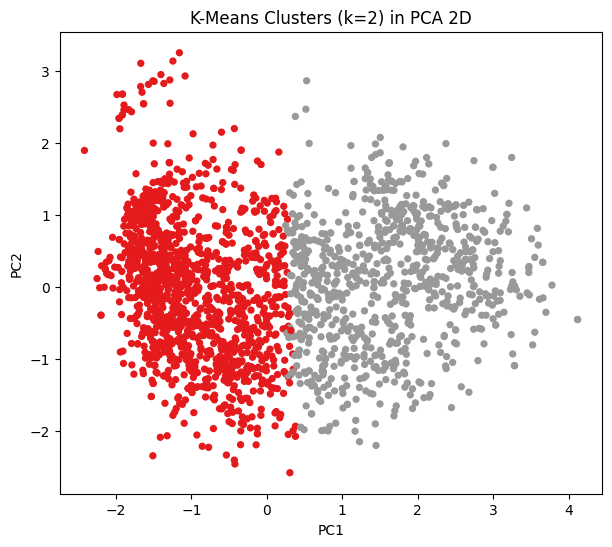

In [40]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
plt.scatter(Z2[:,0], Z2[:,1], c=labels2, s=18, cmap="Set1")
plt.title("K-Means Clusters (k=2) in PCA 2D")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()


In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# --- Force k = 4 ---
k = 4
km4 = KMeans(n_clusters=k, n_init=30, max_iter=600, random_state=7, init="k-means++")
labels4 = km4.fit_predict(Xz)

print("Silhouette (k=4):", round(silhouette_score(Xz, labels4), 3))


Silhouette (k=4): 0.143


In [42]:
out4 = raw.copy()
out4["Segment"] = labels4


In [43]:
profile_vars = ["Income","Age_Years","Spend_Total","Buys_Total","Basket_Avg",
                "Share_Web","Share_Catalog","Share_Store",
                "Recency","NumWebVisitsMonth","Campaigns_Accepted","Complain"]

profile_vars = [v for v in profile_vars if v in out4.columns]

seg_view4 = out4.groupby("Segment")[profile_vars].mean().round(2)
seg_view4["count"] = out4.groupby("Segment").size()

seg_view4

,Income,Age_Years,Spend_Total,Buys_Total,Basket_Avg,Share_Web,Share_Catalog,Share_Store,Recency,NumWebVisitsMonth,Campaigns_Accepted,Complain,count
Segment,,,,,,,,,,,,,
0,78655.91,55.76,1487.98,20.03,76.74,0.23,0.31,0.40,50.10,2.54,0.96,0.00,439
1,34789.17,53.73,72.42,6.88,9.36,0.21,0.05,0.49,48.66,5.96,0.07,0.01,705
2,41891.23,55.56,286.96,13.90,18.89,0.35,0.09,0.31,48.72,7.29,0.17,0.01,544
3,64270.40,60.43,918.35,22.29,41.15,0.28,0.18,0.41,48.89,4.74,0.19,0.01,528


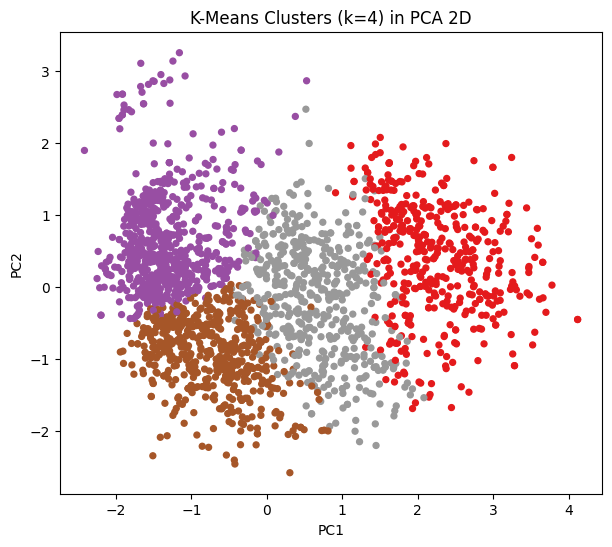

In [49]:
pca2 = PCA(n_components=2, random_state=7)
Z2 = pca2.fit_transform(Xz)

plt.figure(figsize=(7,6))
plt.scatter(Z2[:,0], Z2[:,1], c=labels4, s=18, cmap="Set1")
plt.title("K-Means Clusters (k=4) in PCA 2D")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()
